In [3]:
import torch
import torch.nn as nn
#First Model Linear Regression

In [50]:
#fake data
train_X = torch.randn(100,1) #random numbers
train_Y = 3* train_X + 5 + torch.randn(100,1) * 0.5 #Linear function with limited randomness
#function 3* x_train + 5 + randomness

In [51]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(1,1) # takes one input produces one output
    #In pytorch you write your own forward functions
    def forward(self, x):
        return self.linear(x)

In [52]:
#Running the Linear Model ("Driver Code")
modelLR = LinearRegression()
lossFn = nn.MSELoss() #common also name criterion
optimizer = torch.optim.SGD(modelLR.parameters(), lr=0.01)
for epoch in range(150):
    prediction = modelLR(train_X)
    t_loss = lossFn(prediction, train_Y)
    optimizer.zero_grad() # you have to zero the gradients 
    t_loss.backward() # back propagation 
    optimizer.step() # Learning step 
    if epoch %10 == 0:
        print(f"Epoch:{epoch}, Training Loss:{t_loss.item()}")

Epoch:0, Training Loss:42.179664611816406
Epoch:10, Training Loss:28.6294002532959
Epoch:20, Training Loss:19.463510513305664
Epoch:30, Training Loss:13.259024620056152
Epoch:40, Training Loss:9.056493759155273
Epoch:50, Training Loss:6.208354949951172
Epoch:60, Training Loss:4.2771406173706055
Epoch:70, Training Loss:2.9670636653900146
Epoch:80, Training Loss:2.077988624572754
Epoch:90, Training Loss:1.4744055271148682
Epoch:100, Training Loss:1.0645085573196411
Epoch:110, Training Loss:0.7860652804374695
Epoch:120, Training Loss:0.596869707107544
Epoch:130, Training Loss:0.46828675270080566
Epoch:140, Training Loss:0.38088059425354004


In [53]:
for layer in modelLR.children():
    if isinstance(layer, nn.Linear):
        print(f"Model function = x * {layer.state_dict()['weight']} + {layer.state_dict()['bias']}")


Model function = x * tensor([[2.8911]]) + tensor([4.7447])


In [5]:
#Feed forward Neural Network Classification problem
from sklearn.datasets import make_moons
import numpy as np
from sklearn.model_selection import train_test_split
# generating data using SKlearn 
# Makes two interleaving half circles.
# Its a simple toy dataset which visualizes clustering and classification algorithms 
X,Y = make_moons(n_samples=4000, noise=0.1)
data_X = torch.tensor(X, dtype=torch.float32)
data_Y = torch.tensor(Y, dtype=torch.int64)
train_X, val_X, train_Y, val_Y = train_test_split(data_X,data_Y, test_size=0.2, random_state=111)

test_x, test_y = make_moons(n_samples=400, noise=0.1)
test_X = torch.tensor(test_x, dtype=torch.float32)
test_Y = torch.tensor(test_y, dtype=torch.int64)


In [7]:
#Simple FFNN
class FFNN(nn.Module):
    def __init__(self,dimenisonalEmbedding):
        super(FFNN, self).__init__()
        self.layer1 = nn.Linear(2,dimenisonalEmbedding)
        self.layer2 = nn.Linear(dimenisonalEmbedding,2)
    def forward(self,x):
        x = torch.relu(self.layer1(x))
        return self.layer2(x)

In [17]:
modelFFNN = FFNN(100)
lossFnCE = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelFFNN.parameters(), lr=0.01)

# Training and Validation loop
t_losses = []
v_losses = []
for epoch in range(1000):
    modelFFNN.train()
    prediction = modelFFNN(train_X)
    t_loss = lossFnCE(prediction, train_Y)
    optimizer.zero_grad()
    t_loss.backward()
    optimizer.step()
    t_losses.append(t_loss.detach().numpy())
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Training Loss: {t_loss.item()}")
    modelFFNN.eval()
    optimizer.zero_grad()
    v_pred = modelFFNN(val_X)
    v_loss = lossFnCE(v_pred, val_Y)
    v_losses.append(v_loss.detach().numpy())
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Valdition Loss: {v_loss.item()}")


Epoch: 0, Training Loss: 0.7771123647689819
Epoch: 0, Valdition Loss: 0.6569620370864868
Epoch: 100, Training Loss: 0.027901150286197662
Epoch: 100, Valdition Loss: 0.035883158445358276
Epoch: 200, Training Loss: 0.00875950139015913
Epoch: 200, Valdition Loss: 0.015114597044885159
Epoch: 300, Training Loss: 0.005214053206145763
Epoch: 300, Valdition Loss: 0.010728113353252411
Epoch: 400, Training Loss: 0.003786119632422924
Epoch: 400, Valdition Loss: 0.00876167044043541
Epoch: 500, Training Loss: 0.0030235073063522577
Epoch: 500, Valdition Loss: 0.007532687857747078
Epoch: 600, Training Loss: 0.002558965003117919
Epoch: 600, Valdition Loss: 0.006739558652043343
Epoch: 700, Training Loss: 0.0022528008557856083
Epoch: 700, Valdition Loss: 0.006166315171867609
Epoch: 800, Training Loss: 0.0020325914956629276
Epoch: 800, Valdition Loss: 0.005772063042968512
Epoch: 900, Training Loss: 0.0018661277135834098
Epoch: 900, Valdition Loss: 0.005424413830041885


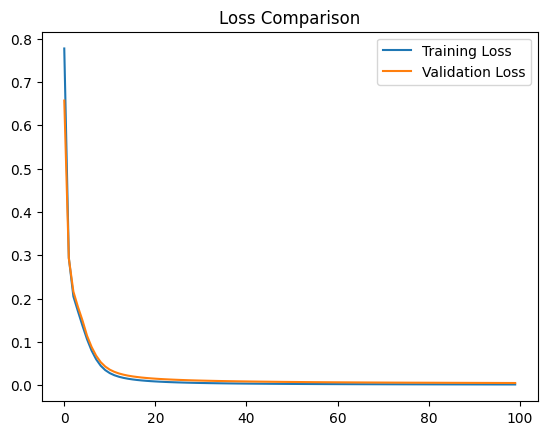

In [18]:
#Ploting Training vs. Validation to check for overfitting
import matplotlib.pyplot as plt
plt.title("Loss Comparison") 
plt.plot(range(len(t_losses)),t_losses, label="Training Loss")
plt.plot(range(len(v_losses)),v_losses, label="Validation Loss")
plt.legend()
plt.show()

In [9]:
predictionTest = modelFFNN(test_X)
testLoss = lossFnCE(predictionTest, test_Y)
print(f"Testing loss = {testLoss.item()}")

Testing loss = 0.0008292653947137296


In [54]:
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

# dataset operations
# turns a image represented as a 2d array into a 1 d array
transform = transforms.Compose([transforms.ToTensor()])
data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_data, test_data = train_test_split(data, test_size=0.1)



train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data)

5


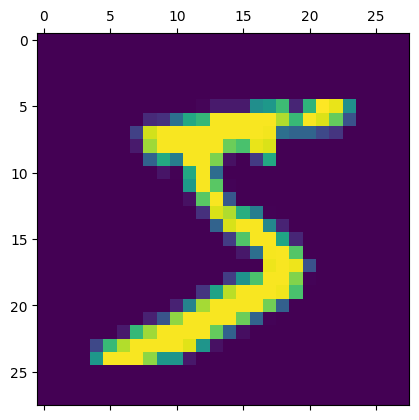

In [55]:
#don't copy this down just done to show the data 
#I need to reload the as I implictly transform the data in the perivous load  
from tensorflow import keras
import matplotlib.pyplot as mplt
#https://keras.io/api/datasets/
(example_x, example_y), (_, _) = keras.datasets.mnist.load_data()
mplt.matshow(example_x[0])
print(example_y[0])

In [56]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.fc1 = nn.Linear(16*26*26, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(-1, 16*26*26)
        return self.fc1(x)

In [57]:
modelCNN = SimpleCNN()
lossFnCE = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCNN.parameters(), lr=0.01)

# Training 
modelCNN.train()
for epoch in range(5):
    for images, labels in train_loader:
        prediction = modelCNN(images)
        t_loss = lossFnCE(prediction, labels)
        optimizer.zero_grad()
        t_loss.backward()
        optimizer.step()
    print(f"epoch {epoch+1}, training loss = {t_loss.item()}")

epoch 1, training loss = 0.1416243463754654
epoch 2, training loss = 0.00411779573187232
epoch 3, training loss = 0.0013235433725640178
epoch 4, training loss = 0.018534086644649506
epoch 5, training loss = 0.0017162300646305084


In [59]:
predictions = []
modelCNN.eval()
trueLabels = []
for images, labels in test_loader:
    prediction = modelCNN(images)
    predictions.append(int(np.argmax(prediction.detach())))
    trueLabels.append(int(labels))

# print(predictions)
# print(trueLabels)


In [60]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(predictions, trueLabels)
cf_matrix

array([[573,   0,   1,   0,   0,   0,   2,   1,   2,   2],
       [  0, 663,   2,   0,   3,   0,   3,   2,   3,   0],
       [  3,   0, 564,   4,   1,   0,   0,   5,   4,   2],
       [  1,   1,  10, 615,   0,   6,   0,   2,   3,   4],
       [  1,   0,   0,   0, 572,   0,   3,   1,   3,   2],
       [  1,   0,   1,   8,   0, 513,   7,   1,   4,   0],
       [  1,   0,   0,   0,   1,   1, 566,   0,   1,   0],
       [  2,   3,   1,   0,   4,   1,   1, 628,   1,   6],
       [  2,   0,   2,   0,   3,   3,   4,   1, 513,   2],
       [  2,   2,   2,   4,  16,   4,   0,   8,  21, 595]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Result')

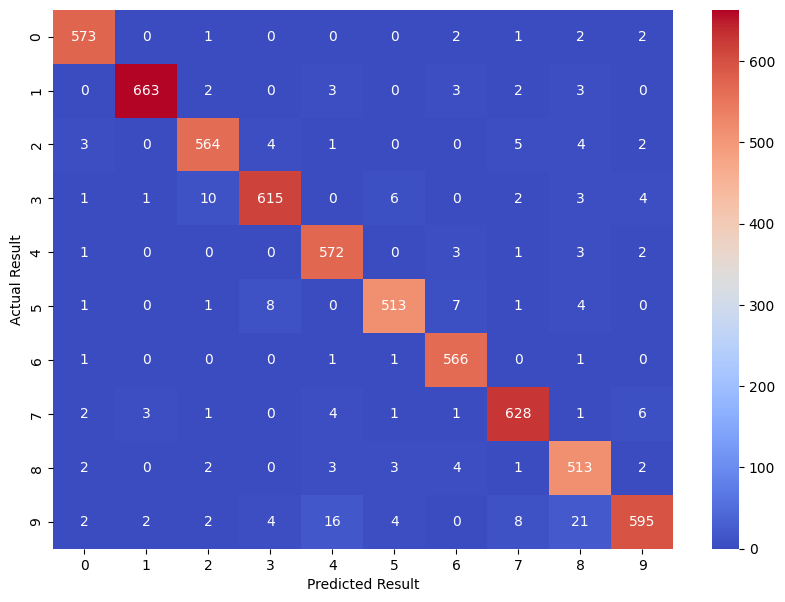

In [61]:
import seaborn as sns
mplt.figure(figsize=(10,7))
sns.color_palette("bright", 10)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="coolwarm")
mplt.xlabel('Predicted Result')
mplt.ylabel('Actual Result')